In [1]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

# RFC

In [14]:
PATH = "/home/WUR/katz001/PROJECTS/permit-nsti-gas"
datasetTimepoint = 'BL'
resultsPath = f"{PATH}/results/40_internalValidation/{datasetTimepoint}"
folderFigures = f"{PATH}/figures/{datasetTimepoint}/40_internalValidation"

''' Load Data '''

model = 'rfc'
n_iter = 1000
with open(f'{resultsPath}/bootstrap_{model}_n{n_iter}_qc.pickle', 'rb') as f:
    dic_summary = pickle.load(f)

0.8390914300269937 0.7786928676851889 0.8936964319457942
0.7026892861921819 0.5915466158893364 0.8071442546239778


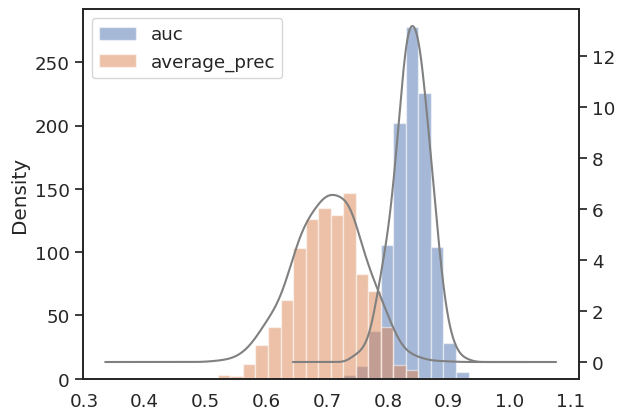

In [15]:
fig, ax = plt.subplots()
df = pd.DataFrame.from_dict(dic_summary).T
df.plot.hist(bins=20, ax=ax, alpha=0.5)
df.plot.density(ax=ax, c="grey", legend=False, bw_method=0.3, secondary_y=True)

#create 95% confidence interval for population mean weight
print(np.mean(df["auc"]),np.percentile(df["auc"], 2.5), np.percentile(df["auc"], 97.5))
print(np.mean(df["average_prec"]),np.percentile(df["average_prec"], 2.5), np.percentile(df["average_prec"], 97.5))

In [16]:
pd.DataFrame.from_dict(dic_summary).mean(axis=1)

auc             0.839091
average_prec    0.702689
dtype: float64

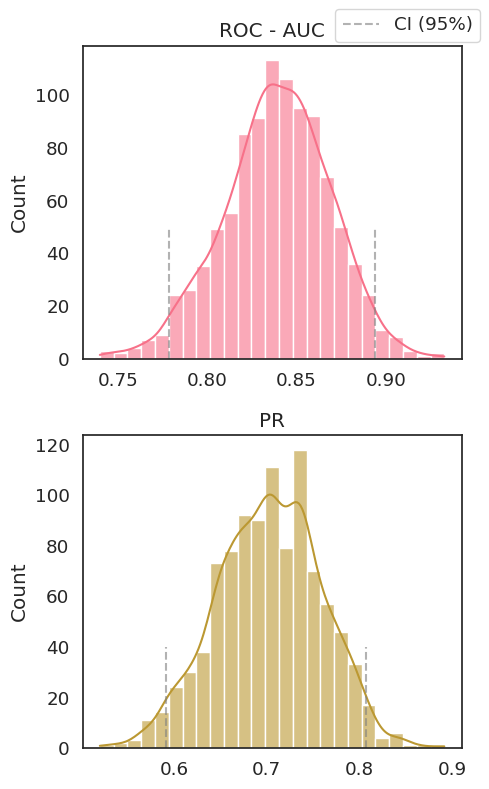

In [17]:
sns.set_theme(style="white", font_scale=1.2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,8))
df = pd.DataFrame.from_dict(dic_summary).T
sns.histplot(data=df["auc"], ax=ax1, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[0])
sns.histplot(data=df["average_prec"], ax=ax2, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[1])
ax1.vlines(np.percentile(df["auc"], 2.5), ymin=0, ymax=50, linestyles='--', color='gray', alpha=0.6)
ax1.vlines(np.percentile(df["auc"], 97.5), ymin=0, ymax=50, linestyles='--', color='gray', alpha=0.6, label="CI (95%)")
ax2.vlines(np.percentile(df["average_prec"], 2.5), ymin=0, ymax=40, linestyles='--', color='gray', alpha=0.6)
ax2.vlines(np.percentile(df["average_prec"], 97.5), ymin=0, ymax=40, linestyles='--', color='gray', alpha=0.6)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_title("ROC - AUC")
ax2.set_title("PR")
fig.legend()
plt.tight_layout()
plt.savefig(f"{folderFigures}/bootstrapping_n{n_iter}_{datasetTimepoint}.png", dpi=300)

In [13]:
df

,auc,average_prec
0,0.838724,0.649572
1,0.780126,0.584165
2,0.786215,0.604832
3,0.815102,0.668561
4,0.803994,0.646578
...,...,...
995,0.840183,0.695772
996,0.831255,0.658220
997,0.839755,0.713763
998,0.876355,0.764342
